Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

Importing dataset

In [2]:
df = pd.read_csv('data/Dataset MeriSKILL.zip', compression='zip', parse_dates=['Order Date'])
pd.set_option("display.max_columns", None)
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


# Exploratory Analysis

Checking for Types of variables

In [3]:
df.drop(columns="Unnamed: 0", inplace= True)
df.set_index('Order ID')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 14.2+ MB


In [4]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18
185949,222909,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta,14


Checking for duplicates

In [5]:
for column in df.columns:
    dup = df[column].duplicated().sum()
    print(f"{column} : {dup}")

Order ID : 7513
Product : 185931
Quantity Ordered : 185941
Price Each : 185933
Order Date : 43555
Purchase Address : 45163
Month : 185938
Sales : 185897
City : 185941
Hour : 185926


Claculating Profit Margin

Taking the Cost as the Quantity Ordered multiplied by Price Each 

And the Profit Margin is Profit Margin=((Revenue−Cost)/Revenue)×100

In [6]:
# Assuming your DataFrame is named df
df['Cost'] = df['Quantity Ordered'] * df['Price Each']

# Calculate Profit Margin
df['Profit Margin'] = ((df['Sales'] - df['Cost']) / df['Sales']) * 100

# Display the modified DataFrame
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Cost,Profit Margin
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1700.00,0.0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,600.00,0.0
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,11.95,0.0
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,149.99,0.0
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,11.95,0.0


## Visualizations

In [7]:
mont = df.groupby("Month")[["Quantity Ordered", "Price Each", "Sales"]].sum().reset_index()
month = pd.DataFrame(mont)

df['Order Date'] = pd.to_datetime(df['Order Date']).dt.date
date = df.groupby('Order Date')[["Quantity Ordered", "Price Each", "Sales"]].sum().reset_index()
date = pd.DataFrame(date)


month.head()
date.head()

,Order Date,Quantity Ordered,Price Each,Sales
0,2019-01-01,343,65420.91,65681.94
1,2019-01-02,368,70407.84,70813.20
2,2019-01-03,330,46793.74,47046.20
3,2019-01-04,330,61779.51,62012.21
4,2019-01-05,355,46160.62,46524.63


Overview of Trends in Sales, Quantity and Unit price

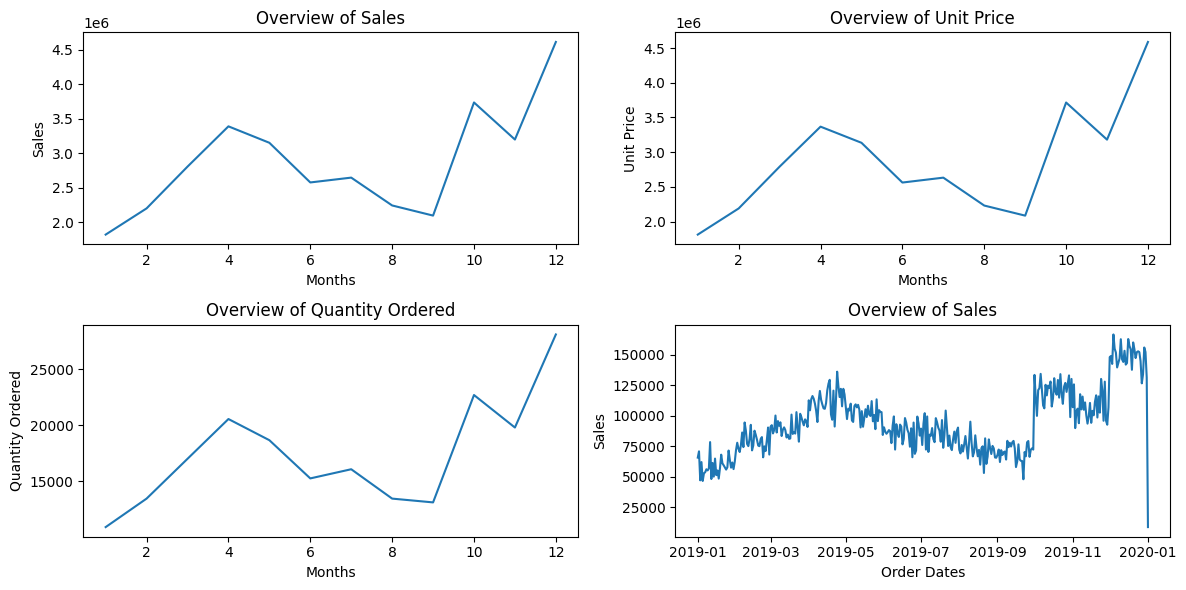

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6)) 

ax[0][0].plot(month['Month'], month['Sales'])
ax[0][0].set_xlabel('Months')
ax[0][0].set_ylabel('Sales')
ax[0][0].set_title('Overview of Sales')

ax[1][0].plot(month['Month'], month['Quantity Ordered'])
ax[1][0].set_xlabel('Months')
ax[1][0].set_ylabel('Quantity Ordered')
ax[1][0].set_title('Overview of Quantity Ordered')

ax[0][1].plot(month['Month'], month['Price Each'])
ax[0][1].set_xlabel('Months')
ax[0][1].set_ylabel('Unit Price')
ax[0][1].set_title('Overview of Unit Price')

ax[1][1].plot(date['Order Date'], date['Sales'])
ax[1][1].set_xlabel('Order Dates')
ax[1][1].set_ylabel('Sales')
ax[1][1].set_title('Overview of Sales')


plt.tight_layout()
plt.show()


Seeing the sales per City

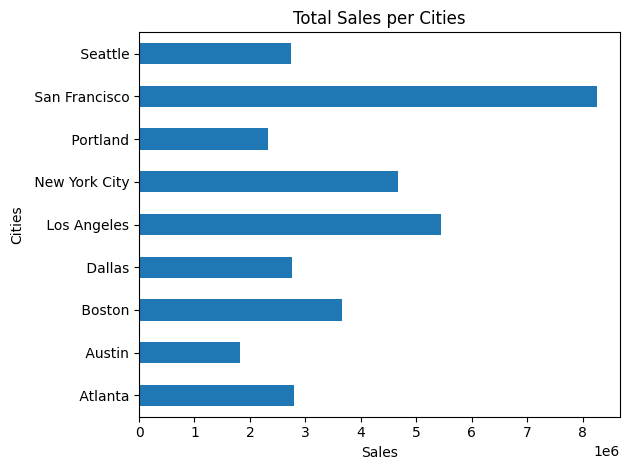

In [9]:
df.groupby("City")["Sales"].sum().plot(kind="barh")
plt.xlabel('Sales')
plt.ylabel('Cities')
plt.title('Total Sales per Cities')
plt.tight_layout()
plt.show()

Seeing from which city the sales originate from

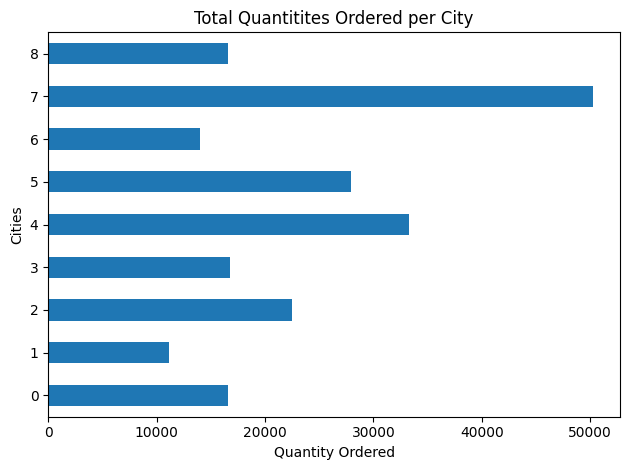

In [10]:
df.groupby("City")["Quantity Ordered"].sum().reset_index().plot(kind = 'barh', legend=None)
plt.xlabel('Quantity Ordered')
plt.ylabel('Cities')
plt.title('Total Quantitites Ordered per City')
plt.tight_layout()
plt.show()

Profit Margins per City

Text(0.5, 1.0, 'Profit margins for each City')

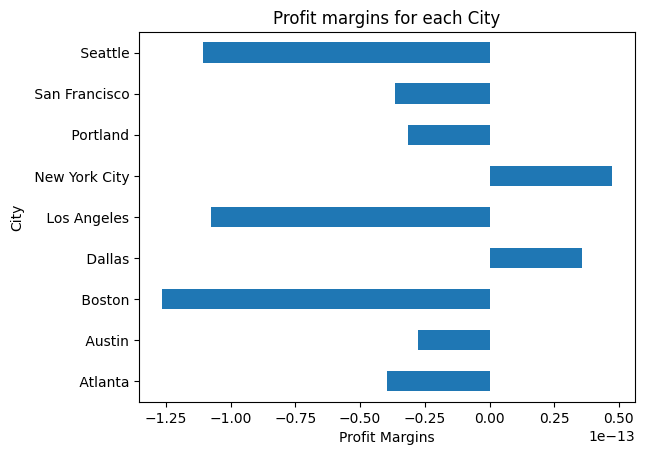

In [11]:
df.groupby('City')['Profit Margin'].sum().plot(kind = 'barh')
plt.xlabel('Profit Margins')
plt.ylabel('City')
plt.title('Profit margins for each City')

Seeing the peek hour for sales

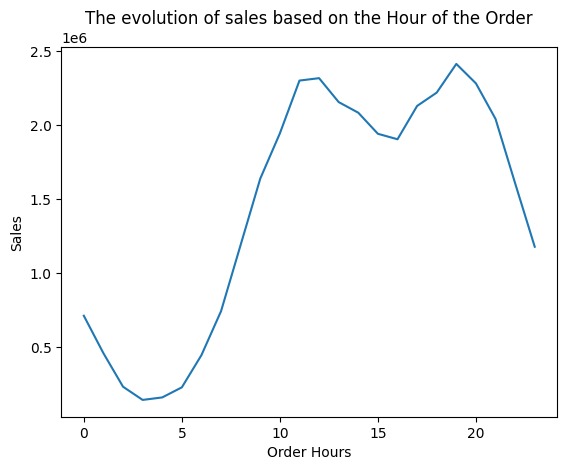

In [12]:
df.groupby('Hour')['Sales'].sum().plot()
plt.xlabel('Order Hours')
plt.ylabel('Sales')
plt.title('The evolution of sales based on the Hour of the Order')
plt.show()

Identifying best selling products

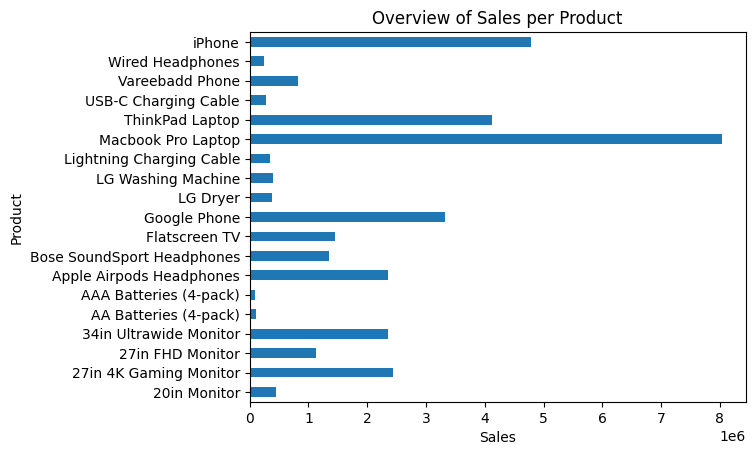

In [13]:
df.groupby('Product')['Sales'].sum().plot(kind = 'barh')
plt.xlabel('Sales')
plt.ylabel('Product')
plt.title('Overview of Sales per Product')
plt.show()

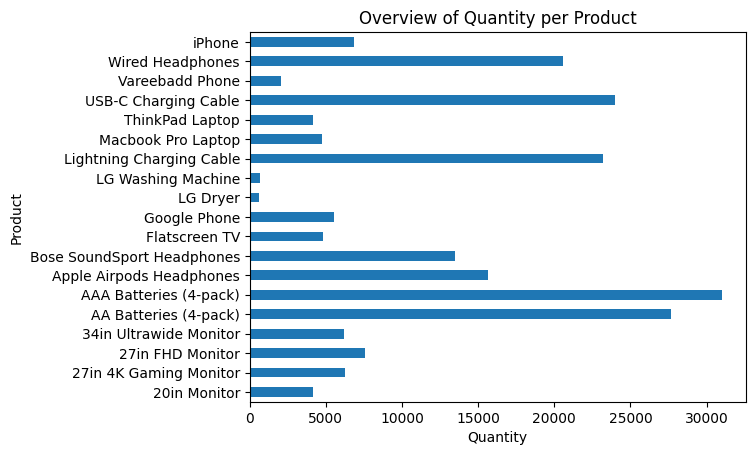

In [14]:
df.groupby('Product')['Quantity Ordered'].sum().plot(kind = 'barh')
plt.xlabel('Quantity')
plt.ylabel('Product')
plt.title('Overview of Quantity per Product')
plt.show()

Profit Margin by Product

Text(0.5, 1.0, 'Profit margins for each product')

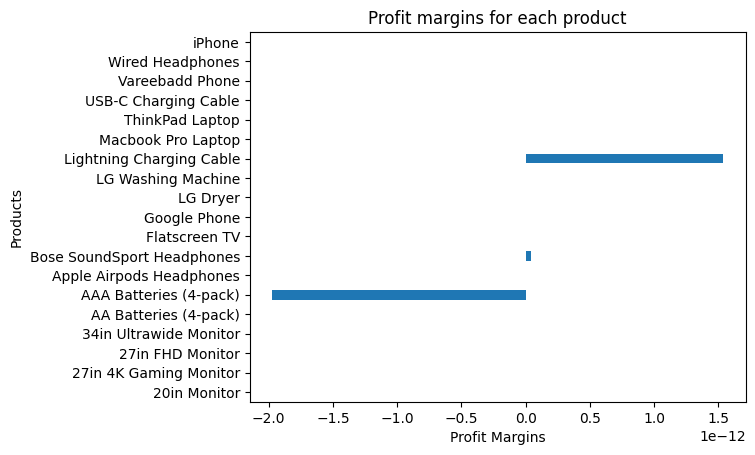

In [15]:
df.groupby('Product')['Profit Margin'].sum().plot(kind = 'barh')
plt.xlabel('Profit Margins')
plt.ylabel('Products')
plt.title('Profit margins for each product')